<a href="https://colab.research.google.com/github/ialara/or-student/blob/main/lectures/Continuous_Dice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import scipy.stats as st
import pylab

Average for 1000000 roles with 1.0 dice/role = 3.5001606121177797 , StDev = 1.4435474000884898
Average for 100000 roles with 10.0 dice/role = 3.5001606121177793 , StDev = 0.45553986263541296
Average for 10000 roles with 100.0 dice/role = 3.5001606121177793 , StDev = 0.14485851931162796
Average for 1000 roles with 1000.0 dice/role = 3.5001606121177793 , StDev = 0.044933576830674254
Average for 100 roles with 10000.0 dice/role = 3.500160612117778 , StDev = 0.015214747440060267
Average for 10 roles with 100000.0 dice/role = 3.500160612117791 , StDev = 0.004508868502862362
Average for 1 role with 1,000,000 dice =  3.5001606121177797 ,   StDev = 1.4435474000884898


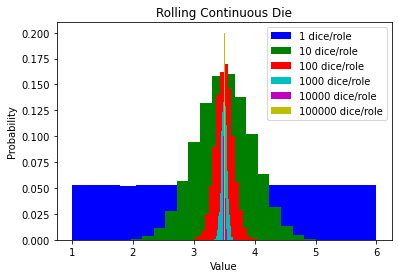

In [17]:
def plot_roles(dice, roles, num_bins, color):
    role_averages = []
    dice_per_role = len(dice)//roles
    for i in range(roles):
        vals = 0
        for j in range(dice_per_role):
            vals += dice[i*dice_per_role + j]
        role_averages.append(vals/float(dice_per_role))
    weights=[1/roles]*roles
    pylab.hist(role_averages, num_bins, color=color, label=str(dice_per_role)+' dice/role', weights=[1/roles]*roles)
    return np.mean(role_averages), np.std(role_averages)

total_dice = 1000000
roles_array = [1000000, 100000, 10000, 1000, 100, 10,]
colors = ['b', 'g','r', 'c', 'm', 'y', 'k']

dice = np.random.uniform(1,6,total_dice)
for i in range(len(roles_array)):
    roles = roles_array[i]
    average, std = plot_roles(dice, roles, 19, colors[i])
    print('Average for', roles,'roles with', total_dice/roles, 'dice/role =', average, ', StDev =', std)
    
print('Average for 1 role with 1,000,000 dice = ', np.mean(dice), ',   StDev =', np.std(dice))

pylab.title('Rolling Continuous Die')
pylab.xlabel('Value')
pylab.ylabel('Probability')
pylab.legend()

In [ ]:
samples = np.random.uniform[1,6,1000000]
delta = 1.96*np.std(samples)/np.sqrt(len(samples))

In [49]:
def conf_inv(dice, roles, confidence_level):
    role_averages = []
    dice_per_role = len(dice)//roles
    for i in range(roles):
        vals = 0
        for j in range(dice_per_role):
            vals += dice[i*dice_per_role + j]
        role_averages.append(vals/float(dice_per_role))
    sample_mean = np.mean(role_averages)
    sample_std = np.std(role_averages, ddof=1)
    CI_lower, CI_upper = st.t.interval(alpha=confidence_level, df=roles-1, loc=sample_mean, scale=sample_std)
    return CI_upper - CI_lower

#total_dice = 1000000
#roles_array = [1000000, 100000, 10000, 1000, 100, 10]
#total_dice = 100
#roles_array = [100, 50, 25, 10, 4, 2]
total_dice = 20
roles_array = [20, 10, 5, 4, 2]
confidence_level = 0.95

#dice = np.random.uniform(1,6,total_dice)
#dice = np.random.exponential(1,total_dice)
spins = np.random.randint(1,38,total_dice)
dice = 36*(spins==11)
print(total_dice, 'total dice')
for roles in roles_array:
    print('For', roles,'total roles of ', total_dice/roles, 'dice/role: confidence interval width =', \
          conf_inv(dice, roles, confidence_level))
    
CI_lower, CI_upper = st.t.interval(alpha=confidence_level, df=total_dice-1, loc=np.mean(dice), scale=np.std(dice))
print('For 1 role of', total_dice, ' dice: confidence interval width =', CI_upper-CI_lower)

20 total dice
For 20 total roles of  1.0 dice/role: confidence interval width = 33.697037262233486
For 10 total roles of  2.0 dice/role: confidence interval width = 25.752848614292603
For 5 total roles of  4.0 dice/role: confidence interval width = 22.349951967667803
For 4 total roles of  5.0 dice/role: confidence interval width = 22.913613398046692
For 2 total roles of  10.0 dice/role: confidence interval width = 64.6894334323855
For 1 role of 20  dice: confidence interval width = 32.843809222435425
